In [1]:
%matplotlib inline
import matplotlib
import seaborn as sns
matplotlib.rcParams['savefig.dpi'] = 144

In [2]:
import expectexception

# Basic data tools: NumPy, Matplotlib, Pandas

Python is a powerful and flexible programming language, but it doesn't have built-in tools for mathematical analysis or data visualization. For most data analysis we will rely on some helpful libraries. We'll explore three libraries that are very common for data analysis and visualization.

## NumPy

First among these is NumPy. The main NumPy features are three-fold: its mathematical functions (e.g. `sin`, `log`, `floor`), its `random` submodule (useful for random sampling), and the NumPy `ndarray` object.

A NumPy array is similar to a mathematical n-dimensional matrix. For example, 

$$\begin{bmatrix}
    x_{11} & x_{12} & x_{13} & \dots  & x_{1n} \\
    x_{21} & x_{22} & x_{23} & \dots  & x_{2n} \\
    \vdots & \vdots & \vdots & \ddots & \vdots \\
    x_{d1} & x_{d2} & x_{d3} & \dots  & x_{dn}
\end{bmatrix}$$

A NumPy array could be 1-dimensional (e.g. [1, 5, 20, 34, ...]), 2-dimensional (as above), or many dimensions. It's important to note that all the rows and columns of the 2-dimensional array are the same length. That will be true for all dimensions of arrays.

Let's contrast this with lists.

In [3]:
# to access NumPy, we have to import it
import numpy as np

In [7]:
list_of_lists = [[1, 2, 3], [4, 5, 6], [7, 8, 9]]
print(list_of_lists)

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]


In [8]:
an_array = np.array(list_of_lists)
print(an_array)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


In [9]:
non_rectangular = [[1, 2], [3, 4, 5], [6, 7, 8, 9]]
print(non_rectangular)

[[1, 2], [3, 4, 5], [6, 7, 8, 9]]


In [10]:
non_rectangular_array = np.array(non_rectangular)
print(non_rectangular_array)

[list([1, 2]) list([3, 4, 5]) list([6, 7, 8, 9])]


Why did these print differently? Let's investigate their _shape_ and _data type_ (`dtype`).

In [11]:
print(an_array.shape, an_array.dtype) #int with 64bits to store data
print(non_rectangular_array.shape, non_rectangular_array.dtype)

(3, 3) int64
(3,) object


The first case, `an_array`, is a 2-dimensional 3x3 array (of integers). In contrast, `non_rectangular_array` is a 1-dimensional length 3 array (of _objects_, namely `list` objects).

We can also create a variety of arrays with NumPy's convenience functions.

In [12]:
np.linspace(5, 10, 10) #inclusive of upperbound

array([ 5.        ,  5.55555556,  6.11111111,  6.66666667,  7.22222222,
        7.77777778,  8.33333333,  8.88888889,  9.44444444, 10.        ])

In [11]:
np.arange(1, 20, 2)

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19])

In [33]:
np.array(range(1,10)) #data type is array

array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [12]:
np.logspace(1, 5, 10) #default base 10 to the 10 power 

array([1.00000000e+01, 2.78255940e+01, 7.74263683e+01, 2.15443469e+02,
       5.99484250e+02, 1.66810054e+03, 4.64158883e+03, 1.29154967e+04,
       3.59381366e+04, 1.00000000e+05])

In [14]:
np.zeros(10) #arrays populated with zeros

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [15]:
np.zeros((10,5,2)) #3d array of 10 slices. 5rows 2col  but all 0

array([[[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]],

       [[0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.],
        [0., 0.]]])

In [16]:
np.ones(2)

array([1., 1.])

In [23]:
np.diag([1,2,3,4])

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [24]:
np.eye(5) #identity matrix

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1.]])

We can also convert the `dtype` of an array after creation.

In [25]:
print(np.logspace(1, 10, 10).dtype)
print(np.logspace(1, 10, 10).astype(int).dtype)

float64
int64


In [26]:
np.array([False, True]).astype(float)

array([0., 1.])

Why does any of this matter?

Arrays are often more efficient in terms of code as well as computational resources for certain calculations. Computationally this efficiency comes from the fact that we pre-allocate a contiguous block of memory for the results of our computation.

To explore the advantages in code, let's try to do some math on these numbers.

First let's simply calculate the sum of all the numbers and look at the differences in the necessary code for `list_of_lists`, `an_array`, and `non_rectangular_array`.

In [38]:
list_of_lists

[[1, 2, 3], [4, 5, 6], [7, 8, 9]]

In [39]:
print(sum([sum(inner_list) for inner_list in list_of_lists]))
print(an_array.sum())

45
45


In [44]:
[sum (inner_list) for inner_list in list_of_lists]

[6, 15, 24]

In [18]:
an_array.sum(axis=1) #across all the rows

array([ 6, 15, 24])

In [52]:
[sum(row[index] for row in list_of_lists) for index in range(len(list_of_lists))]

[12, 15, 18]

In [43]:
an_array.sum(axis=0) #across all col

array([12, 15, 18])

Summing the numbers in an array is much easier than for a list of lists. We don't have to dig into a hierarchy of lists, we just use the `sum` method of the `ndarray`. Does this still work for `non_rectangular_array`?

In [13]:
# what happens here?
print(non_rectangular_array.sum())

[1, 2, 3, 4, 5, 6, 7, 8, 9]


Remember `non_rectangular_array` is a 1-dimensional array of `list` objects. The `sum` method tries to add them together: first list + second list + third list. Addition of lists results in _concatenation_.

In [14]:
# concatenate three lists
print([1, 2] + [3, 4, 5] + [6, 7, 8, 9])

[1, 2, 3, 4, 5, 6, 7, 8, 9]


The contrast becomes even more clear when we try to sum rows or columns individually.

In [15]:
print('Array row sums: ', an_array.sum(axis=1))
print('Array column sums: ', an_array.sum(axis=0))

Array row sums:  [ 6 15 24]
Array column sums:  [12 15 18]


In [16]:
print('List of list row sums: ', [sum(inner_list) for inner_list in list_of_lists])

def column_sum(list_of_lists):
    running_sums = [0] * len(list_of_lists[0])
    for inner_list in list_of_lists:
        for i, number in enumerate(inner_list):
            running_sums[i] += number
            
    return running_sums

print('List of list column sums: ', column_sum(list_of_lists))

List of list row sums:  [6, 15, 24]
List of list column sums:  [12, 15, 18]


Generally it is much more natural to do mathematical operations with arrays than lists.

In [4]:
a = np.array([1, 2, 3, 4, 5])
print(a + 5) # add a scalar
print(a * 5) # multiply by a scalar
print(a / 5) # divide by a scalar (note the float!)

[ 6  7  8  9 10]
[ 5 10 15 20 25]
[0.2 0.4 0.6 0.8 1. ]


In [5]:
b = a + 1
print(a + b) # add together two arrays
print(a * b) # multiply two arrays (element-wise)
print(a / b.astype(float)) # divide two arrays (element-wise)

[ 3  5  7  9 11]
[ 2  6 12 20 30]
[0.5        0.66666667 0.75       0.8        0.83333333]


Arrays can also be used for linear algebra, acting as vectors, matrices, tensors, etc.

In [6]:
print(np.dot(a, b)) # inner product of two arrays
print(np.outer(a, b)) # outer product of two arrays

70
[[ 2  3  4  5  6]
 [ 4  6  8 10 12]
 [ 6  9 12 15 18]
 [ 8 12 16 20 24]
 [10 15 20 25 30]]


Arrays have a lot to offer us in terms of representing and analyzing data, since we can easily apply mathematical functions to data sets or sections of data sets. Most of the time we won't run into any trouble using arrays, but it's good to be mindful of the restrictions around shape and datatype.

These restrictions around `shape` and `dtype` allow the `ndarray` objects to be much more performant compared to a general Python `list`.  There are few reasons for this, but the main two result from the typed nature of the `ndarray`, as this allows contiguous memory storage and consistent function lookup.  When a Python `list` is summed, Python needs to figure out at runtime the correct way in which to add each element of the list together.  When an `ndarray` is summed, `NumPy` already knows the type of the each element (and they are consistent), thus it can sum them without checking the correct add function for each element.

Lets see this in action by doing some basic profiling.  First we will create a list of 100000 random elements and then time the sum function.

In [30]:
time_list = [np.random.random() for _ in range(100000)]
time_arr = np.array(time_list)

In [31]:
%%timeit 
sum(time_list)

563 µs ± 33.9 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [32]:
%%timeit
np.sum(time_arr)

50.6 µs ± 640 ns per loop (mean ± std. dev. of 7 runs, 10000 loops each)


### Universal functions

`NumPy` defines a `ufunc` which allows it to efficiently run functions over arrays.  Many of these functions are built in, such as `np.cos`, and implemented in highly performance compiled `C` code.  These functions can perform `broadcasting` which allows them to automatically handle operations between arrays of different shapes, for example two arrays with the same shape, or an array and a scalar.

### Changing Shape

Often we will want to take arrays that are one shape and transform them to a different shape more amenable to a specific operation.

In [36]:
print(an_array)
an_array[1,1] = 10
print(an_array)

[[1 2 3]
 [4 5 6]
 [7 8 9]]
[[ 1  2  3]
 [ 4 10  6]
 [ 7  8  9]]


In [41]:
an_array.shape = (9,)

In [42]:
an_array #no 2nd dimension

array([ 1,  2,  3,  4, 10,  6,  7,  8,  9])

In [22]:
mat = np.random.rand(20, 10) #generate 20 rows and col randomly

In [51]:
mat.shape

(20, 10)

In [50]:
mat.reshape(40, 5).shape #reshape from 20x10 to 40x5

(40, 5)

In [52]:
mat = np.random.rand(10,5)
mat

array([[0.57964993, 0.34156321, 0.53726342, 0.46011916, 0.58476611],
       [0.40030049, 0.69766757, 0.18006727, 0.69650147, 0.41166121],
       [0.8743176 , 0.51523605, 0.97311035, 0.6019354 , 0.22384907],
       [0.82179064, 0.34508263, 0.34761921, 0.03180468, 0.54871531],
       [0.5344235 , 0.35599148, 0.89421726, 0.1287484 , 0.33009951],
       [0.32158276, 0.09229059, 0.48114539, 0.68778472, 0.51165701],
       [0.15697768, 0.37728597, 0.00259502, 0.86830111, 0.08451701],
       [0.59727808, 0.986257  , 0.53659065, 0.92404176, 0.23611653],
       [0.75995541, 0.53126575, 0.72051606, 0.06234136, 0.14773909],
       [0.13311693, 0.68716551, 0.84444067, 0.74961623, 0.03047215]])

In [55]:
mat.reshape(5,10)

array([[0.57964993, 0.34156321, 0.53726342, 0.46011916, 0.58476611,
        0.40030049, 0.69766757, 0.18006727, 0.69650147, 0.41166121],
       [0.8743176 , 0.51523605, 0.97311035, 0.6019354 , 0.22384907,
        0.82179064, 0.34508263, 0.34761921, 0.03180468, 0.54871531],
       [0.5344235 , 0.35599148, 0.89421726, 0.1287484 , 0.33009951,
        0.32158276, 0.09229059, 0.48114539, 0.68778472, 0.51165701],
       [0.15697768, 0.37728597, 0.00259502, 0.86830111, 0.08451701,
        0.59727808, 0.986257  , 0.53659065, 0.92404176, 0.23611653],
       [0.75995541, 0.53126575, 0.72051606, 0.06234136, 0.14773909,
        0.13311693, 0.68716551, 0.84444067, 0.74961623, 0.03047215]])

In [44]:
%%expect_exception ValueError

mat.reshape(30, 5)

---------------------------------------------------------------------------
ValueError                                Traceback (most recent call last)
<ipython-input-44-8f32a9a8072f> in <module>()
      1 
----> 2 mat.reshape(30, 5)

ValueError: cannot reshape array of size 200 into shape (30,5)


In [56]:
mat.ravel().shape #ravel unravels array to 1 dimension

(50,)

In [23]:
mat.transpose().shape

(10, 20)

### Combining arrays

In [58]:
print(a)
print(b)

[1 2 3 4 5]
[2 3 4 5 6]


In [59]:
np.hstack((a, b)) #horizontal stacking
 

array([1, 2, 3, 4, 5, 2, 3, 4, 5, 6])

In [60]:
np.vstack((a, b)) #vertical stacking

array([[1, 2, 3, 4, 5],
       [2, 3, 4, 5, 6]])

In [61]:
np.dstack((a, b)) #depth stack, its rows becomes column

array([[[1, 2],
        [2, 3],
        [3, 4],
        [4, 5],
        [5, 6]]])

### Basic data aggregation

Let's explore some more examples of using arrays, this time using NumPy's `random` submodule to create some "fake data". Simulating data is useful for testing and prototyping new techniques or code, and some algorithms even require random input.

In [17]:
np.random.seed(42)
jan_coffee_sales = np.random.randint(25, 200, size=(4, 7))
print(jan_coffee_sales) #btw 4 and 200 4 weeks 7 days

[[127 117  39 131  96  45 127]
 [146  99 112 141 124 128 176]
 [155 174  77  26 112 182  62]
 [154  45 185  82  46 113  73]]


In [18]:
jan_coffee_sales.mean()

110.5

In [19]:
#see average sales on monday
jan_coffee_sales[:,1].mean()

108.75

In [19]:
jan_coffee_sales[1:3,1]

array([ 99, 174])

In [20]:
jan_coffee_sales[0, 1:-1] #row 0 from ele 1 not including -1

array([117,  39, 131,  96,  45])

In [21]:
jan_coffee_sales[:,1] #select all the monday

array([117,  99, 174,  45])

In [20]:
# mean sales
print('Mean coffees sold per day in January: %d' % jan_coffee_sales.mean())

Mean coffees sold per day in January: 110


In [21]:
# mean sales for Monday
print('Mean coffees sold on Monday in January: %d' % jan_coffee_sales[:, 1].mean())

Mean coffees sold on Monday in January: 108


In [30]:
jan_coffee_sales_list = jan_coffee_sales.ravel().tolist()#ravel turn it to a 1D array then tolist() makes it to a list
max(jan_coffee_sales_list) # max in jan_coffee_sales_list is 185
jan_coffee_sales_list.index(max(jan_coffee_sales_list)) #185 is in position 23

23

In [14]:
# day with most sales
# remember we count dates from 1, not 0!
print('Day with highest sales was January %d' % (jan_coffee_sales.argmax() + 1))

Day with highest sales was January 24


In [16]:
# is there a weekly periodicity?
from fractions import Fraction

normalized_sales = (jan_coffee_sales - jan_coffee_sales.mean()) / abs(jan_coffee_sales - jan_coffee_sales.mean()).max()
frequencies = [Fraction.from_float(f).limit_denominator() for f in np.fft.fftfreq(normalized_sales.size)]
power = np.abs(np.fft.fft(normalized_sales.ravel()))**2
list(zip(frequencies, power))[:len(power) // 2]

#fraction (0,1) 0 in a day, (1,28)once in 28 days right side is power.

[(Fraction(0, 1), 4.930380657631324e-32),
 (Fraction(1, 28), 11.81850804066758),
 (Fraction(1, 14), 3.062417712828277),
 (Fraction(3, 28), 3.6145035763808604),
 (Fraction(1, 7), 8.99248933467605),
 (Fraction(5, 28), 3.689054592513947),
 (Fraction(3, 14), 8.363267066546033),
 (Fraction(1, 4), 16.615944819859244),
 (Fraction(2, 7), 0.6736105397207641),
 (Fraction(9, 28), 6.846412421396464),
 (Fraction(5, 14), 14.279717692527928),
 (Fraction(11, 28), 17.951272090034657),
 (Fraction(3, 7), 4.608890497088776),
 (Fraction(13, 28), 6.579601542582696)]

In [18]:
np.arange(10)[::2]

array([0, 2, 4, 6, 8])

In [33]:
np.array([n for n in np.random.randint(1,10,100) if n%2 == 0]) #get even numbers between 1-10, 100 elements

array([4, 4, 6, 8, 8, 6, 8, 4, 4, 2, 8, 2, 2, 6, 2, 6, 4, 8, 6, 8, 4, 2,
       6, 6, 6, 4, 4, 4, 4, 8, 2, 8, 2, 4, 2, 4, 8, 6, 8])

In [35]:
random_array = np.random.randint(1,10,100)
random_array[random_array%2 == 0] # can take array and slice through itself

array([8, 4, 8, 4, 6, 8, 4, 2, 2, 2, 6, 4, 4, 4, 8, 8, 6, 6, 6, 6, 6, 8,
       2, 4, 6, 8, 4, 2, 6, 8, 8, 2, 6, 2, 2, 8, 6, 2, 8, 4, 4, 8, 2, 2,
       6])

In [36]:
random_array%2 == 0 #this is a boolean, pick out elements that are true

array([False,  True,  True, False,  True,  True,  True,  True,  True,
       False, False, False, False,  True,  True,  True,  True, False,
       False,  True, False,  True, False, False,  True,  True,  True,
       False, False, False, False, False,  True, False,  True,  True,
        True, False,  True,  True,  True, False, False, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False,  True, False, False, False, False,  True, False, False,
       False, False,  True, False,  True, False,  True,  True,  True,
        True, False,  True,  True, False,  True, False, False,  True,
       False, False, False,  True, False,  True, False, False,  True,
        True, False,  True, False, False,  True,  True, False,  True,
       False])

In [37]:
random_array[[1,2,4,5,6]] #get out value from indicies 

array([8, 4, 8, 4, 6])

Some of the functions we used above do not exist in standard Python and are provided to us by NumPy. Additionally we see that we can use the shape of an array to help us compute statistics on a subset of our data (e.g. mean number of coffees sold on Mondays). But one of the most powerful things we can do to explore data is to simply visualize it.

## Matplotlib

Matplotlib is the most popular Python plotting library. It allows us to visualize data quickly by providing a variety of types of graphs (e.g. bar, scatter, line, etc.). It also provides useful tools for arranging multiple images or image components within a figure, enabling us to build up more complex visualizations as we need to.

Let's visualize some data! In the next cells, we'll generate some data. For now we'll be focusing on how the graphs are produced rather than how the data is made.

In [20]:
import matplotlib.pyplot as plt

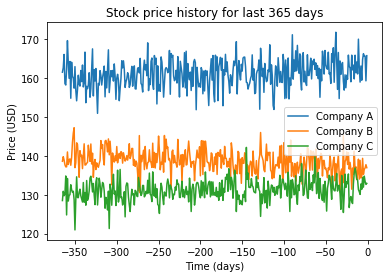

In [21]:
def gen_stock_price(days, initial_price): #2 arguments
    # stock price grows or shrinks linearly
    # not exceeding 10% per year (heuristic)
    trend = initial_price * (1 + np.arange(days) * .1 / 365 * np.random.rand() * np.random.choice([1, -1]) + 1)
    #the trend consist of a random choice +ve or -ve, choose a random number between 0 and 1 for the rate of growth. limit the overall
    #growth to be 10% a year multiply by all of the days 
    # noise will be about 2%
    noise = .02 * np.random.randn(len(trend)) * trend
    #random.randn generate random normal distribution between +-2
    return trend + noise #stock price has 2 comp trend + noise

days = 365
initial_prices = [80, 70, 65] # company a,b,c start price
for price in initial_prices:
    plt.plot(np.arange(-days, 0), gen_stock_price(days, price))
    # x axis np.arrange -365 day to today, y axis gen stock prices
plt.title('Stock price history for last %d days' % days)
plt.xlabel('Time (days)')
plt.ylabel('Price (USD)')
plt.legend(['Company A', 'Company B', 'Company C'])

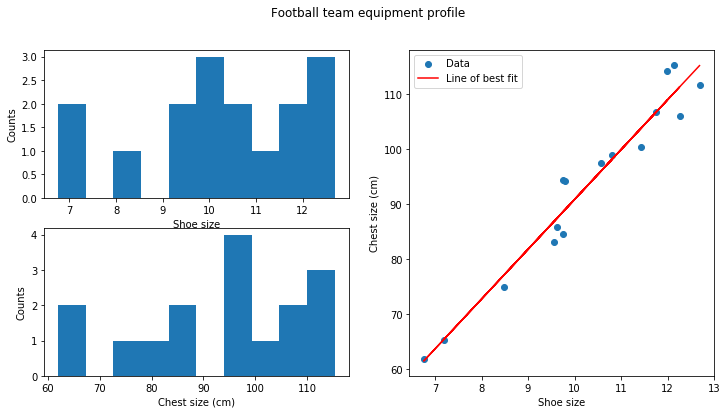

In [22]:
from scipy.stats import linregress

def gen_football_team(n_players, mean_shoe, mean_jersey):
    shoe_sizes = np.random.normal(size=n_players, loc=mean_shoe, scale=.15 * mean_shoe)
    jersey_sizes = mean_jersey / mean_shoe * shoe_sizes + np.random.normal(size=n_players, scale=.05 * mean_jersey)

    return shoe_sizes, jersey_sizes

shoes, jerseys = gen_football_team(16, 11, 100)

fig = plt.figure(figsize=(12, 6)) #create a figure using plt and store in variable
fig.suptitle('Football team equipment profile')

ax1 = plt.subplot(221) #create variable to store instead of just plt.plot
ax1.hist(shoes)
ax1.set_xlabel('Shoe size')
ax1.set_ylabel('Counts')

ax2 = plt.subplot(223)
ax2.hist(jerseys)
ax2.set_xlabel('Chest size (cm)')
ax2.set_ylabel('Counts')

ax3 = plt.subplot(122)
ax3.scatter(shoes, jerseys, label='Data')
ax3.set_xlabel('Shoe size')
ax3.set_ylabel('Chest size (cm)')

fit_line = linregress(shoes, jerseys)
ax3.plot(shoes, fit_line[1] + fit_line[0] * shoes, 'r', label='Line of best fit')

handles, labels = ax3.get_legend_handles_labels()
ax3.legend(handles[::-1], labels[::-1])


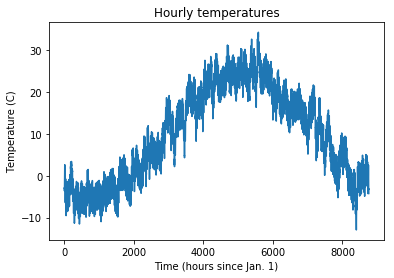

In [59]:
def gen_hourly_temps(days):
    ndays = len(days)
    seasonality = (-15 * np.cos((np.array(days) - 30) * 2.0 * np.pi / 365)).repeat(24) + 10
    solar = -3 * np.cos(np.arange(24 * ndays) * 2.0 * np.pi / 24)
    weather = np.interp(range(len(days) * 24), range(0, 24 * len(days), 24 * 2), 3 * np.random.randn(np.ceil(float(len(days)) / 2).astype(int)))
    noise = .5 * np.random.randn(24 * len(days))

    return seasonality + solar + weather + noise

days = np.arange(365)
hours = np.arange(days[0] * 24, (days[-1] + 1) * 24)
plt.plot(hours, gen_hourly_temps(days))
plt.title('Hourly temperatures')
plt.xlabel('Time (hours since Jan. 1)')
plt.ylabel('Temperature (C)')

In the examples above we've made use of the ubiquitous `plot` command, `subplot` for arranging multiple plots in one image, and `hist` for creating histograms. We've also used both the "state machine" (i.e. using a sequence of `plt.method` commands) and "object-oriented" (i.e. creating figure objects and mutating them) plotting paradigms. The Matplotlib package is very flexible and the possibilities for visualizing data are mostly limited by imagination. A great way to explore Matplotlib and other data visualization packages is by consulting their [gallery pages](https://matplotlib.org/gallery.html).

# Pandas

NumPy is useful for handling data as it lets us efficiently apply functions to whole data sets or select pieces of them. However, it can be difficult to keep track of related data that might be stored in different arrays, or the meaning of data stored in different rows or columns of the same array.

For example, in the previous section we had a 1-dimensional array for shoe sizes, and another 1-dimensional array for jersey sizes. If we wanted to look up the shoe and jersey size for a particular player, we'd have to remember his position in each array.

Alternatively, we could combine the two 1-dimensional arrays to make a 2-dimensional array with `n_players` rows and two columns (one for shoe size, one for jersey size). But once we combine the data, we now have to remember which column is shoe size and which column is jersey size.

The Pandas package introduces a very powerful tool for working with data in Python: the DataFrame. A DataFrame is a table. Each column represents a different type of data (sometimes called a **field**). The columns are named, so I could have a column called `'shoe_size'` and a column called `'jersey_size'`. I don't have to remember which column is which, because I can refer to them by name. Each row represents a different **record** or **entity** (e.g. player). I can also name the rows, so instead of remembering which row in my array corresponds with Ronaldinho, I can name the row 'Ronaldinho' and look up his shoe size and jersey size by name.

In [23]:
shoes

array([ 9.62967818, 10.80460352, 10.56567077, 11.75592912,  7.19951217,
       12.25844651,  9.74925001,  9.56390236, 11.99705552,  8.47673629,
        9.76075917,  9.79176804,  6.75648672, 11.43226053, 12.13426122,
       12.68807553])

In [24]:
jerseys

array([ 85.87021616,  98.84120569,  97.46658255, 106.65326909,
        65.22943715, 105.99456   ,  94.42153569,  83.06296388,
       114.20921129,  74.9100614 ,  84.58493717,  94.10922282,
        61.94101823, 100.36018436, 115.3393001 , 111.57103466])

In [25]:
import pandas as pd

players = ['Ronaldinho', 'Pele', 'Lionel Messi', 'Zinedine Zidane', 'Didier Drogba', 'Ronaldo', 'Yaya Toure', 
           'Frank Rijkaard', 'Diego Maradona', 'Mohamed Aboutrika', "Samuel Eto'o", 'George Best', 'George Weah', 
           'Roberto Donadoni']
shoes, jerseys = gen_football_team(len(players), 10, 100)

df = pd.DataFrame({'shoe_size': shoes, 'jersey_size': jerseys}, index = players)
#dic of data series
df

,jersey_size,shoe_size
Ronaldinho,94.733486,9.723386
Pele,97.583765,9.492140
Lionel Messi,104.768901,9.719618
Zinedine Zidane,72.969776,8.168102
Didier Drogba,90.054488,9.244393
Ronaldo,105.063826,10.665276
Yaya Toure,79.022735,7.629336
Frank Rijkaard,125.273564,12.600625
Diego Maradona,111.188561,10.863266
Mohamed Aboutrika,117.460222,11.319351


In [69]:
# we can also make a dataframe using zip

df = pd.DataFrame(list(zip(shoes, jerseys)), columns = ['shoe_size', 'jersey_size'], index = players)

df

,shoe_size,jersey_size
Ronaldinho,8.518446,90.306982
Pele,3.971318,30.834821
Lionel Messi,8.581797,89.058359
Zinedine Zidane,9.441798,101.467505
Didier Drogba,9.911440,108.552835
Ronaldo,9.593783,89.807493
Yaya Toure,14.201315,141.283393
Frank Rijkaard,10.737048,107.125149
Diego Maradona,8.143536,84.812953
Mohamed Aboutrika,10.983351,109.010365


The DataFrame has similarities to both a `dict` and a NumPy `ndarray`. For example, we can retrieve a column from the DataFrame by using its name, just like we would retrieve an item from a `dict` using its key.

In [65]:
print(df['shoe_size'])

Ronaldinho            8.518446
Pele                  3.971318
Lionel Messi          8.581797
Zinedine Zidane       9.441798
Didier Drogba         9.911440
Ronaldo               9.593783
Yaya Toure           14.201315
Frank Rijkaard       10.737048
Diego Maradona        8.143536
Mohamed Aboutrika    10.983351
Samuel Eto'o         10.587215
George Best           8.425134
George Weah          10.433208
Roberto Donadoni     10.795227
Name: shoe_size, dtype: float64


And we can easily apply functions to the DataFrame, just like we would with a NumPy array.

In [70]:
print(np.log(df))

                   shoe_size  jersey_size
Ronaldinho          2.142234     4.503215
Pele                1.379098     3.428645
Lionel Messi        2.149643     4.489292
Zinedine Zidane     2.245146     4.619739
Didier Drogba       2.293690     4.687237
Ronaldo             2.261115     4.497668
Yaya Toure          2.653335     4.950768
Frank Rijkaard      2.373700     4.673998
Diego Maradona      2.097224     4.440448
Mohamed Aboutrika   2.396381     4.691443
Samuel Eto'o        2.359647     4.627863
George Best         2.131219     4.446611
George Weah         2.344994     4.631272
Roberto Donadoni    2.379104     4.707395


In [71]:
df.mean()

shoe_size       9.594616
jersey_size    96.664289
dtype: float64

We'll explore applying functions and analyzing data in a DataFrame in more depth later on. First we need to know how to retrieve, add, and remove data from a DataFrame.

We've already seen how to retrieve a column, what about retrieving a row? The most flexible syntax is to use the DataFrame's `loc` method.

In [74]:
print(df.loc['Ronaldo'])

shoe_size       9.593783
jersey_size    89.807493
Name: Ronaldo, dtype: float64


In [73]:
print(df.loc['Ronaldo', 'shoe_size'])

9.593783090795847


In [75]:
print(df.loc[['Ronaldo', 'George Best'], 'shoe_size'])

Ronaldo        9.593783
George Best    8.425134
Name: shoe_size, dtype: float64


In [76]:
# can also select position-based slices of data
print(df.loc['Ronaldo':'George Best', 'shoe_size']) #include in slice

Ronaldo               9.593783
Yaya Toure           14.201315
Frank Rijkaard       10.737048
Diego Maradona        8.143536
Mohamed Aboutrika    10.983351
Samuel Eto'o         10.587215
George Best           8.425134
Name: shoe_size, dtype: float64


In [77]:
# for position-based indexing, we will typically use iloc
print(df.iloc[:5])

                 shoe_size  jersey_size
Ronaldinho        8.518446    90.306982
Pele              3.971318    30.834821
Lionel Messi      8.581797    89.058359
Zinedine Zidane   9.441798   101.467505
Didier Drogba     9.911440   108.552835


In [78]:
print(df.iloc[2:4, 0])

Lionel Messi       8.581797
Zinedine Zidane    9.441798
Name: shoe_size, dtype: float64


In [82]:
# to see just the top of the DataFrame, use head
df.head(2) #first 2

,shoe_size,jersey_size
Ronaldinho,8.518446,90.306982
Pele,3.971318,30.834821


In [80]:
# of for the bottom use tail
df.tail()

,shoe_size,jersey_size
Mohamed Aboutrika,10.983351,109.010365
Samuel Eto'o,10.587215,102.295183
George Best,8.425134,85.337223
George Weah,10.433208,102.644573
Roberto Donadoni,10.795227,110.763217


Just as with a `dict`, we can add data to our DataFrame by simply using the same syntax as we would use to retrieve data, but matching it with an assignment.

In [30]:
# adding a new column
df['position'] = np.random.choice(['goaltender', 'defense', 'midfield', 'attack'],size=len(df))
df.head()

,jersey_size,shoe_size,position
Ronaldinho,94.733486,9.723386,goaltender
Pele,97.583765,9.492140,midfield
Lionel Messi,104.768901,9.719618,goaltender
Zinedine Zidane,72.969776,8.168102,midfield
Didier Drogba,90.054488,9.244393,midfield


In [28]:
# adding a new row
df.loc['Dylan'] = {'jersey_size': 91, 'shoe_size': 9, 'position': 'midfield'}
df.loc['Dylan']

jersey_size          91
shoe_size             9
position       midfield
Name: Dylan, dtype: object

To delete data, we can use the DataFrame's `drop` method.

In [91]:
df.drop('Dylan')

,shoe_size,jersey_size,position
Ronaldinho,8.518446,90.306982,defense
Pele,3.971318,30.834821,midfield
Lionel Messi,8.581797,89.058359,goaltender
Zinedine Zidane,9.441798,101.467505,defense
Didier Drogba,9.911440,108.552835,midfield
Ronaldo,9.593783,89.807493,midfield
Yaya Toure,14.201315,141.283393,attack
Frank Rijkaard,10.737048,107.125149,defense
Diego Maradona,8.143536,84.812953,midfield
Mohamed Aboutrika,10.983351,109.010365,goaltender


In [92]:
df.drop('position', axis=1)

,shoe_size,jersey_size
Ronaldinho,8.518446,90.306982
Pele,3.971318,30.834821
Lionel Messi,8.581797,89.058359
Zinedine Zidane,9.441798,101.467505
Didier Drogba,9.911440,108.552835
Ronaldo,9.593783,89.807493
Yaya Toure,14.201315,141.283393
Frank Rijkaard,10.737048,107.125149
Diego Maradona,8.143536,84.812953
Mohamed Aboutrika,10.983351,109.010365


data frame retruna copy and does not mutate it 

Notice when we executed `df.drop('position', axis=1)`, there was an entry for `Dylan` even though we had just executed `df.drop('Dylan')`. We have to be careful when using `drop`; many DataFrame functions return a _copy_ of the DataFrame. In order to make the change permanent, we either need to reassign `df` to the copy returned by `df.drop()` or we have to use the keyword `inplace`.

In [93]:
df = df.drop('Dylan') #to overwrite new version
print(df)

                   shoe_size  jersey_size    position
Ronaldinho          8.518446    90.306982     defense
Pele                3.971318    30.834821    midfield
Lionel Messi        8.581797    89.058359  goaltender
Zinedine Zidane     9.441798   101.467505     defense
Didier Drogba       9.911440   108.552835    midfield
Ronaldo             9.593783    89.807493    midfield
Yaya Toure         14.201315   141.283393      attack
Frank Rijkaard     10.737048   107.125149     defense
Diego Maradona      8.143536    84.812953    midfield
Mohamed Aboutrika  10.983351   109.010365  goaltender
Samuel Eto'o       10.587215   102.295183      attack
George Best         8.425134    85.337223      attack
George Weah        10.433208   102.644573    midfield
Roberto Donadoni   10.795227   110.763217     defense


In [ ]:
df.drop('position', axis=1, inplace=True)
print(df) #specify inplace = true to mutate it 

We'll explore Pandas in much more detail later in the course, since it has many powerful tools for data analysis. However, even with these tools you can already start to discover patterns in data and draw interesting conclusions.

*Copyright &copy; 2017 The Data Incubator.  All rights reserved.*